<img src="./img/HWNI_logo.svg"/>

# Lab 02a - Inferential Statistics

In [2]:
# makes our plots show up inside Jupyter
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab02utils as utils 

### Inferring Parameters

When we infer or estimate parameters, we always have assumptions about our data in mind. If we want our estimation to make the best use of our data, to be *efficient*, we need to think critically about those assumptions.

As an example of different choices we can make when estimating parameters, let's focus on data that comes from a distribution where the mean and the median are in the same spot. What do we call this property?.

<font color='#1874CD'> ** Symmetry.**

Distributions like these have a "center", which is sometimes called the "location parameter". 

If we estimate this center with the median or with the mean, the average value of our estimate, averaged over possible datasets, is equal to the value of the center. An estimator that has this property is called an *unbiased* estimator. Surprisingly, there are often situations where a biased estimator is a good choice. We'll be focusing on unbiased estimators in this class.

We could, however, also take a dataset, throw out all except the third number, and use that as our estimate for the center. This will also be an unbiased estimator. Can you think of some reasons why this is a bad estimator?

<font color='#1874CD'> ** The variance, or average squared error, of this estimator will be higher.**

In this exercise, we'll investigate whether the mean or the median of the dataset is a better choice for estimating the center of the population.

Two distributions that have centers are the Gaussian, or Normal, distribution, and the Laplace distribution. We've already discussed the importance of the Gaussian distribution in class.

The [Laplace distribution](https://en.wikipedia.org/wiki/Laplace_distribution) is known for having a tendency to produce more outliers than a Gaussian distribution with the same variance. Take a look at the plot below, and try to convince yourself this is true. If you're curious about where the Laplace distribution comes from, read the paragraph below.

A Laplace distribution might show up in neuroscience as the distribution of differences in inter-spike intervals for a neuron that uses firing rate, and not spike timing, to encode information. It also appears in the dimensionality reduction technique [Independent Component Analysis](https://en.wikipedia.org/wiki/Independent_component_analysis).

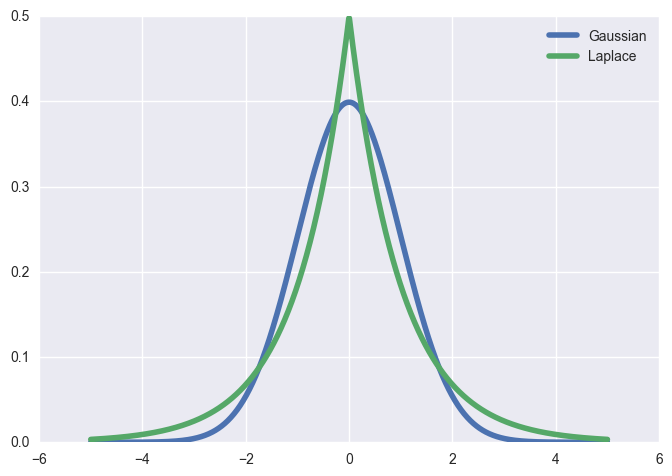

In [3]:
utils.plotDistributions()

Let's run some experiments to see how our two estimators, the sample mean and the sample median, perform on these two distributions. Our experiments will involve drawing a sample of a given size, computing the mean and median. In a given experiment, we'll do this many times.

#### Programming Note: Documenting Functions

The `runExperiment` function takes three keyword arguments, `distribution`, `numDatasets`, and `sampleSize`. It returns two lists. A detailed description appears at the start of the function definition below. This is called a "docstring", and you can view it for any function at any time by running a code cell that contains `nameOfFunction?`. You might want to try this on `utils.generateDataset`, in case you're curious what that function does.

You can add a docstring to a function you wrote by including it, as I did below, between two sets of three quotation marks at the beginning of the function. This is good practice, even if you're the only one who ever uses a function, since it means that if you come back to it after months of not using it, you can quickly remember how it works.

In [4]:
def runExperiment(distribution='gauss',numDatasets=2500,sampleSize=5,):
    """
    draws random samples from the given distribution and calculates
     the mean and the median of those samples.
    
    Parameters
    ----------
    distribution : string, either 'gauss' or 'laplace'
    numDatasets  : integer, number of random samples to draw
    sampleSize   : integer, size of each random sample
    
    Returns
    -------
    sampleMeans   : numpy float array, means of each sample
    sampleMedians : numpy float array, medians of each sample
    """
    
    sampleMeans = []; sampleMedians = []
    datasets = [utils.generateDataset(sampleSize,distribution) for ii in range(numDatasets)]
    
    for dataset in datasets:
        sampleMeans.append(np.mean(dataset))
        sampleMedians.append(np.median(dataset))
        
    return sampleMeans, sampleMedians

The code cell below will run an experiment and plot a histogram of the resulting means and medians.

Add some code that measures the average squared error of the two estimators and `print`s the result. Note that the correct answer is 0.

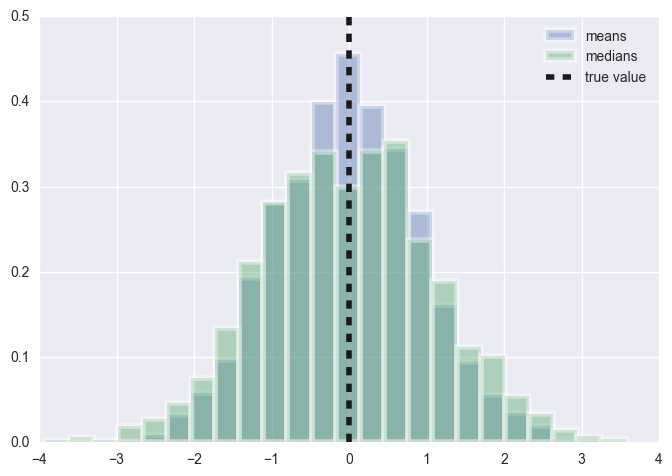

In [6]:
sampleMeans, sampleMedians = runExperiment(distribution='gauss',
                                           numDatasets=2500,
                                           sampleSize=20,)

utils.plotExperiment(sampleMeans,sampleMedians)

MSE_mean = np.mean(np.square(sampleMeans))
MSE_median = np.mean(np.square(sampleMedians))

print("Average Squared Error for mean is: {}".format(MSE_mean))
print("Average Squared Error for median is: {}".format(MSE_median))

At a sample size of 5, which estimator is better, i.e., has lower error, for the Gaussian distribution? What about the Laplace distribution?

<font color='#1874CD'> **For the Gaussian, it is the mean. For the Laplace distribution, it's the median. **

Increase the size to 50, and then 1000. What happens to the error? Does the best estimator stay the same?

<font color='#1874CD'> **The error goes down, but the best estimator stays the same.**

It's often said that the median is "robust to outliers". How does this connect to its performance as an estimator for the Laplace distribution?

<font color='#1874CD'> ** The Laplace distribution produces lots of outliers that have a stronger effect on the mean than on the median.**

## Confidence Intervals

We use confidence intervals to estimate our uncertainty about a value. In your own words, describe what a confidence interval is.

<font color='#1874CD'> ** A confidence interval is a random interval that has a sampling distribution under which the probability that the interval contains the true parameter is some known value. The most common choice is 95%. **

The validity and utility of confidence intervals depend critically on whether our assumptions about our data are true.

The code below will simulate a statistical procedure where we compute the mean of some Gaussian data, assume that the sampling distribution of the mean is Gaussian and that the population has the same standard deviation as our sample, and produce 95% confidence intervals.

There are two cases when our assumption that the sampling distribution of the mean is Gaussian will be true or close to true. If two, or N, random variables have a Gaussian distribution, then their sum has a Gaussian distribution, so their average, which is just their sum divided by a number, also has a Gaussian distribution. 

What's the other case in which our assumption is close to true?

<font color='#1874CD'> ** If the datapoints are not Gaussian, then their sum (and therefore mean) is still approximately Gaussian if there are enough of them. This is the substance of the Central Limit Theorem **

When will our assumption that the standard deviation of our sample is the standard deviation be a good assumption? Hint: just as we calculate the mean by adding up a bunch of random numbers, we calculate the standard deviation by adding up a bunch of random numbers.

<font color='#1874CD'> ** When we have a large sample size, our assumption is more valid. **

In [7]:
def computeConfidenceInterval(dataset,standardDev=None):
    """
    assuming the sample mean is normally distributed,
     compute a 95% confidence interval for the mean
    """
    
    # estimate mean
    mean = np.mean(dataset)
    
    # estimate standard error of the mean,
    #  aka standard deviation of the mean
    
    if standardDev != None: #if we know the standardDev
        # divide by sqrt N to get standard error
        standardError = standardDev/np.sqrt(len(dataset))
    else: #if we don't know the standardDev
        # estimate it using
        standardError = np.std(dataset,ddof=1)/np.sqrt(len(dataset))
    
    # assuming the mean is distributed as a Gaussian,
    #  use the ~2 standard deviations rule to make the 95% interval
    
    interval = [mean-1.96*standardError,mean+1.96*standardError]
    
    return interval

As before, we'll repeat this procedure many times, drawing many samples of the same size, and see how our statistic, the confidence interval, performs.

The code cell below will generate `numDatasets` samples, each of size `datasetSize`, and then calculate a confidence interval for the mean based on the assumptions above. It then plots those intervals as horizontal lines, with the result from each dataset at a different vertical position. Intervals in red are those that fail to contain the true value of the parameter (here, 0).

Write your own code to take the intervals and calculate the fraction of intervals that contains the true value, 0. The intervals are returned as a "list of lists": `intervals[0]` is a single interval, and `intervals[0][0]` is the lower bound of that interval.

0.95


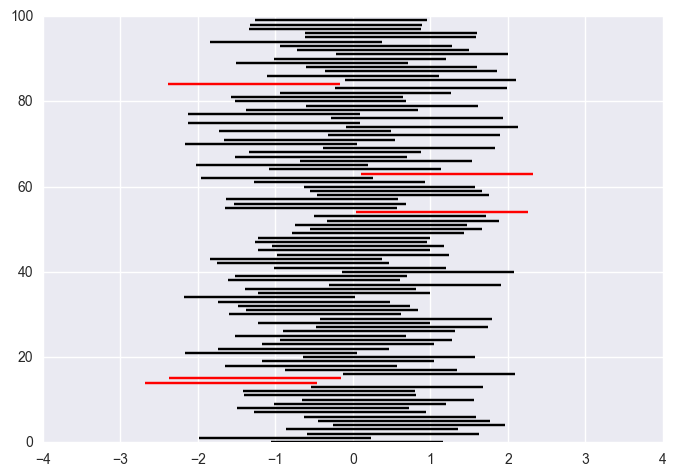

In [7]:
datasetSize = 50
distribution = 'gauss'
numDatasets = 100

datasets = [utils.generateDataset(datasetSize,distribution) for _ in range(numDatasets)]

intervals = [computeConfidenceInterval(dataset,standardDev=4) for dataset in datasets]

utils.plotConfidenceIntervals(intervals,0)

def computeFraction(intervals,trueValue):
    print(sum([interval[0] < 0 < interval[1] for interval in intervals])/len(intervals))

computeFraction(intervals,0)

Write a function to compute what fraction of the intervals contains the true parameter. What value do you expect to see?

<font color='#1874CD'> ** I expect to see 0.95.**

Now, run this experiment many times and check - is your result close to this value?

<font color='#1874CD'> ** It is! **

Decrease the `datasetSize` to 5 and re-run the experiment above. What happens to the fraction of intervals that contain the true parameter? We made two assumptions about our data to make our confidence intervals. Which one is violated here?

<font color='#1874CD'> ** The fraction goes down. Our assumption that the standard deviation of the sample is close to the true value is incorrect, because our sample size is small. In fact, the sample standard deviation is a biased estimator of the true value that tends to underestimate the population's true spread. This bias gets smaller quickly as the sample size goes up.  **

Run experiments with the distribution set to Laplace and dataset sizes of 5 and 50. In one of these cases, the fraction of "95% confidence intervals" that contain the true parameter should not be as advertised. Which case is it, and how are our assumptions is being violated?

<font color='#1874CD'> ** In the case where the dataset size is 5, our assumption that the sampling distribution is Gaussian is incorrect. Note that this assumption comes before the assumption that the standard deviation of that Gaussian sampling distribution (aka the standard error) is close to the standard deviation of the sample divided by $\sqrt{N}$. **

The true standard deviation of the data is 4. Add the keyword argument `standardDev` with the value `4` to `computeConfidenceInterval` -- that is, `computeConfidenceInterval(dataset,standardDev=4)`. This allows us to compute the confidence interval using the _true_ standard deviation of the population. 

Run the experiment above with the `distribution` set to `gauss`, the `datasetSize` at 5 and the true standard deviation. What happens to the fraction of intervals that contain the true parameter, as compared to the case where we don't know the true standard deviation?

<font color='#1874CD'> ** The fraction is now correct, as the intervals are slightly larger. **

**Challenge Question**: Look up the *Student's t-distribution*, brought to prominence by Guinness' professional statistician WS Gossett in the early 1900s. What does this distribution have to do with the failure of our confidence intervals in the case of small sample sizes with unknown standard deviations?

<font color='#1874CD'> ** The t-distribution is used to get accurate confidence intervals in the case where the standard deviation of the population is unknown. **